In [51]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [52]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [53]:
df=pd.read_csv('german_credit.csv')
df.head().T

,0,1,2,3,4
default,0,1,0,0,1
account_check_status,< 0 DM,0 <= ... < 200 DM,no checking account,< 0 DM,< 0 DM
duration_in_month,6,48,12,42,24
credit_history,critical account/ other credits existing (not ...,existing credits paid back duly till now,critical account/ other credits existing (not ...,existing credits paid back duly till now,delay in paying off in the past
purpose,domestic appliances,domestic appliances,(vacation - does not exist?),radio/television,car (new)
credit_amount,1169,5951,2096,7882,4870
savings,unknown/ no savings account,... < 100 DM,... < 100 DM,... < 100 DM,... < 100 DM
present_emp_since,.. >= 7 years,1 <= ... < 4 years,4 <= ... < 7 years,4 <= ... < 7 years,1 <= ... < 4 years
installment_as_income_perc,4,2,2,2,3
personal_status_sex,male : single,female : divorced/separated/married,male : single,male : single,male : single


In [54]:
# Lets build a Ensemble model but need to modify the dataset first
df.shape

(1000, 21)

In [55]:
df.ndim

2

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [56]:
# Print Shape of model data
df.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

In [61]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.get_dummies(df[feature])
        df_new=pd.concat([df,df[feature]])
df_new.shape        

(1000, 75)

In [62]:
df_new.dtypes

default                                       int64
account_check_status                         object
duration_in_month                             int64
credit_history                               object
purpose                                      object
                                              ...  
unskilled - resident                          uint8
none                                          uint8
yes, registered under the customers name      uint8
no                                            uint8
yes                                           uint8
Length: 75, dtype: object

### Check for highly correlated variables but don't required any treatment for this use case

In [63]:
df_new.corr().T

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,0 <= ... < 200 DM,< 0 DM,...,own,rent,management/ self-employed/ highly qualified employee/ officer,skilled employee / official,unemployed/ unskilled - non-resident,unskilled - resident,none,"yes, registered under the customers name",no,yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.064820e-03,-0.095359,0.095359,-0.054097,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.078121,-0.011162,...,0.006553,-0.212620,0.127605,-0.148283,0.059954,4.371237e-02,-0.145259,0.145259,-0.006151,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.052662,-0.029195,...,0.041386,-0.058070,-0.010906,-0.001471,0.059582,-1.039203e-02,-0.065553,0.065553,-0.009717,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.066643,0.059041,...,-0.027579,-0.063033,-0.015096,-0.106737,-0.007723,1.450658e-01,0.014753,-0.014753,0.077071,-0.077071
0 <= ... < 200 DM,0.119581,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,1.000000,-0.372670,...,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.015276,0.015276,-0.059172,0.059172
< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,-0.372670,1.000000,...,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.067149,-0.067149,0.057751,-0.057751


### Drop the original variables which are converted to dummy

In [64]:
df_new.head().T

,0,1,2,3,4
default,0,1,0,0,1
account_check_status,< 0 DM,0 <= ... < 200 DM,no checking account,< 0 DM,< 0 DM
duration_in_month,6,48,12,42,24
credit_history,critical account/ other credits existing (not ...,existing credits paid back duly till now,critical account/ other credits existing (not ...,existing credits paid back duly till now,delay in paying off in the past
purpose,domestic appliances,domestic appliances,(vacation - does not exist?),radio/television,car (new)
credit_amount,1169,5951,2096,7882,4870
savings,unknown/ no savings account,... < 100 DM,... < 100 DM,... < 100 DM,... < 100 DM
present_emp_since,.. >= 7 years,1 <= ... < 4 years,4 <= ... < 7 years,4 <= ... < 7 years,1 <= ... < 4 years
installment_as_income_perc,4,2,2,2,3
personal_status_sex,male : single,female : divorced/separated/married,male : single,male : single,male : single


In [20]:
df1 = df_new.drop(["account_check_status","credit_history","purpose", "savings","present_emp_since","personal_status_sex","other_debtors","property","other_installment_plans","housing","job" ,"telephone" ,"foreign_worker"],axis='columns')

In [21]:
df1.head().T

,0,1,2,3,4
default,0,1,0,0,1
duration_in_month,6,48,12,42,24
credit_amount,1169,5951,2096,7882,4870
installment_as_income_perc,4,2,2,2,3
present_res_since,4,2,3,4,4
age,67,22,49,45,53
credits_this_bank,2,1,1,1,2
people_under_maintenance,1,1,2,2,2
0 <= ... < 200 DM,0,1,0,0,0
< 0 DM,1,0,0,1,1


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [65]:
X=df1.drop('default',axis=1)
y=df1['default']

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=7)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
RFmodel = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
# Fit on training data
RFmodel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [69]:
from sklearn.metrics import confusion_matrix
y_pred=RFmodel.predict(X_test)
print("Accuracy is",RFmodel.score(X_test , y_test))
print("Confusion matrix:", confusion_matrix(y_test, y_pred))

Accuracy is 0.8
Confusion matrix: [[204  13]
 [ 47  36]]


### Q6 Show the list of the features importance( 1 Marks)

In [70]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, RFmodel.predict(X_train))

perm_imp_rfpimp = permutation_importances(RFmodel, X_train, y_train, r2)
perm_imp_rfpimp

,Importance
Feature,
no checking account,0.187003
credit_amount,0.066787
< 0 DM,0.066787
age,0.046751
duration_in_month,0.026715
none,0.026715
none,0.020036
real estate,0.013357
bank,0.013357


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [71]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [80]:
# Use below values
num_folds = 10
seed = 77
kf = KFold(n_splits=10)
kf.get_n_splits(X)


10

In [0]:
#Validate the Random Forest model build above using k fold

In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [0]:
#Calculate Mean score

In [0]:
# Calculate score standard deviation using std()

# Q8 Print the confusion matrix( 1 Marks)

In [73]:
print("Confusion matrix:", confusion_matrix(y_test, y_pred))

Confusion matrix: [[204  13]
 [ 47  36]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [74]:
from sklearn import metrics
y_pred_prob = RFmodel.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

In [75]:
print("True Positive Rate Or Recall is:",tpr)

True Positive Rate Or Recall is: [0.         0.01204819 0.01204819 0.07228916 0.07228916 0.08433735
 0.10843373 0.12048193 0.14457831 0.14457831 0.15662651 0.15662651
 0.18072289 0.18072289 0.20481928 0.21686747 0.24096386 0.26506024
 0.31325301 0.31325301 0.3373494  0.34939759 0.36144578 0.37349398
 0.38554217 0.39759036 0.39759036 0.40963855 0.40963855 0.43373494
 0.43373494 0.46987952 0.48192771 0.4939759  0.4939759  0.51807229
 0.54216867 0.56626506 0.56626506 0.56626506 0.57831325 0.60240964
 0.62650602 0.63855422 0.63855422 0.65060241 0.6746988  0.68674699
 0.69879518 0.69879518 0.71084337 0.71084337 0.71084337 0.72289157
 0.73493976 0.73493976 0.73493976 0.73493976 0.74698795 0.75903614
 0.75903614 0.77108434 0.79518072 0.79518072 0.80722892 0.80722892
 0.81927711 0.81927711 0.81927711 0.81927711 0.8313253  0.8313253
 0.8313253  0.8313253  0.8313253  0.8313253  0.8313253  0.84337349
 0.84337349 0.85542169 0.85542169 0.86746988 0.86746988 0.86746988
 0.86746988 0.87951807 0.89156

# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [76]:
#Hint: Use roc_curve

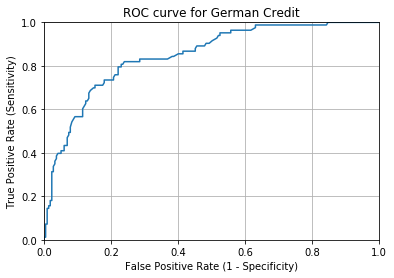

In [77]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for German Credit')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [78]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8477319415912499


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
